# Security of models
---
Can we fool the models? 


In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

---

## Prepare models

In [2]:
from image_processing_workshop.utils import get_image_from_url
from image_processing_workshop.visual import plot_image, plot_classify
from image_processing_workshop.utils import get_imagenet_category_names
from torchvision import datasets, transforms
from torchvision import models
import torch
import os

os.environ["TORCH_HOME"] = "./"

In [3]:
transformation = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

In [4]:
resnet18 = models.resnet18(pretrained=True)
resnet18.fc = torch.nn.Sequential(
    resnet18.fc, 
    torch.nn.Softmax(dim=1))

info = resnet18.eval()

In [5]:
squeezenet = models.squeezenet1_1(pretrained=True)
squeezenet.classifier = torch.nn.Sequential(
    squeezenet.classifier, 
    torch.nn.Softmax(dim=1))

info = squeezenet.eval()

---

## Classify image to ImageNet categories

In [6]:
url1 = 'http://british-samoyed-club.co.uk/bsc/wp-content/uploads/scooter.jpg'
url2 = 'https://timedotcom.files.wordpress.com/2017/05/star-wars_1024.jpg'

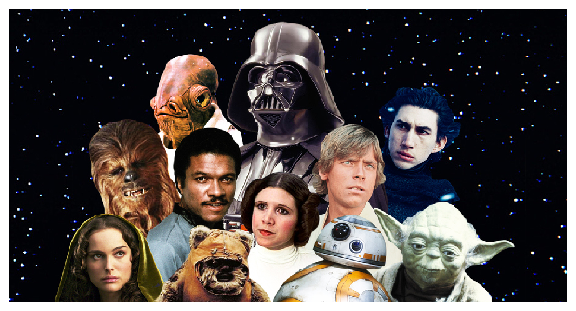

In [7]:
img = get_image_from_url(url2, resize=[600])
plot_image(img)

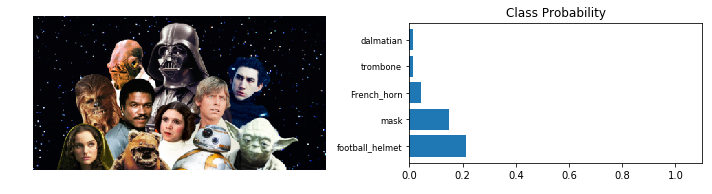

In [8]:
transformed_img = transformation(img)
plot_classify(transformed_img, resnet18, topn=5, category_names=get_imagenet_category_names(), figsize=(10,10))

---

## Patch the images

In [9]:
from image_processing_workshop.utils import get_patch, apply_patch

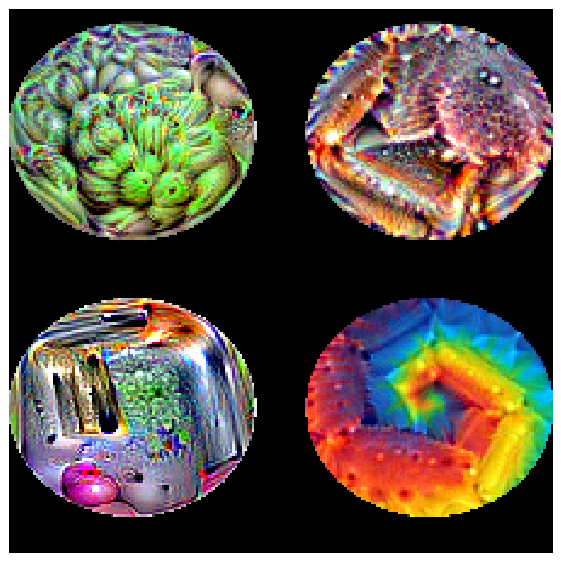

In [10]:
patches = get_patch()
plot_image(patches)

In [11]:
# Select your model and image
url = url2
model = resnet18

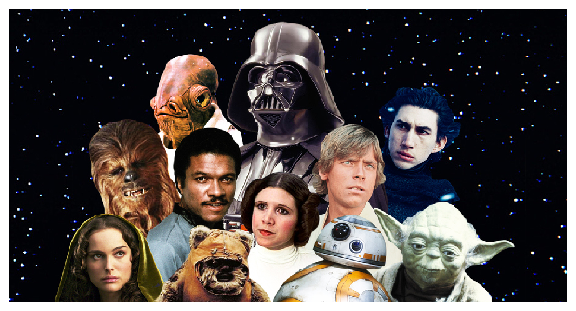

In [12]:
img = get_image_from_url(url, resize=[600])
plot_image(img)

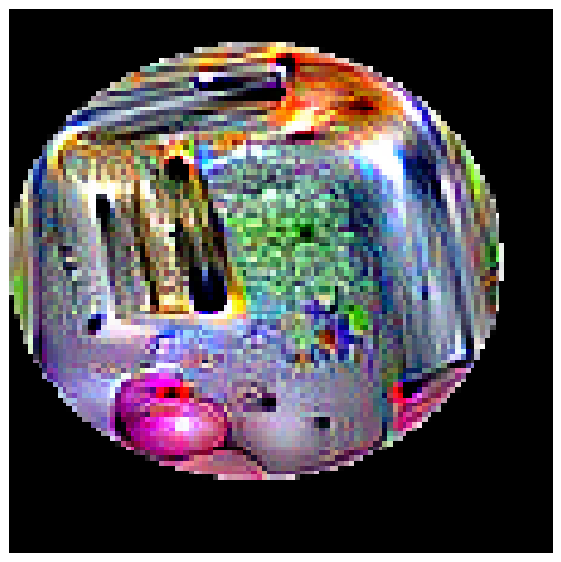

In [13]:
patch = get_patch(2, resize=[200])
plot_image(patch)

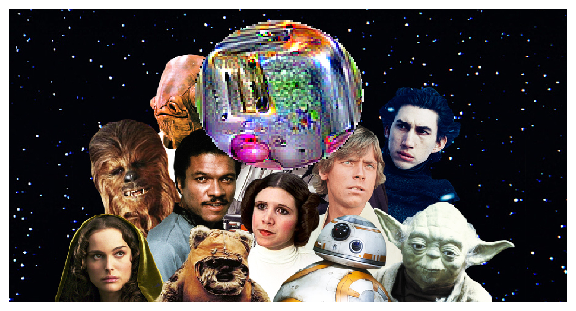

In [14]:
img_patched = apply_patch(img, patch, pos_w=200, pos_h=0)
plot_image(img_patched)

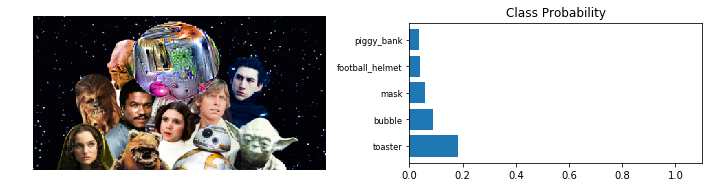

In [15]:
transformed_img = transformation(img_patched)
plot_classify(transformed_img, model, topn=5, category_names=get_imagenet_category_names(), figsize=(10,10))